In [1]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.metrics import precision_recall_curve
from sklearn.externals import joblib

Using TensorFlow backend.


In [2]:
testDF = pd.read_pickle("testingDF.pkl")

In [3]:
testDF

,h_pt,h_eta,h_phi,h_deta,h_dphi,mueta_1,mueta_2,ncentJets,njets,mjj_1,mjj_2,detajj_1,detajj_2,nbtagJets,metpt,label
0,80.839539,-0.453098,2.889144,0.144659,4.200487,-0.196131,-0.340790,1.0,1.0,0.000000,0.000000,-1.000000,-1.000000,0.0,20.458990,"[0, 0, 1, 0]"
1,28.227856,-3.066677,-1.459950,0.610568,2.621638,-2.001726,-1.391158,0.0,0.0,0.000000,0.000000,-1.000000,-1.000000,0.0,20.822760,"[0, 0, 0, 1]"
2,7.673492,4.041984,0.938043,0.709987,3.227020,1.788709,1.078722,0.0,0.0,0.000000,0.000000,-1.000000,-1.000000,0.0,22.304468,"[0, 0, 0, 1]"
3,40.239792,-0.500218,0.840050,1.356293,3.018683,0.238859,-1.117435,1.0,1.0,0.000000,0.000000,-1.000000,-1.000000,0.0,34.850601,"[0, 0, 0, 1]"
4,63.906437,0.959887,-0.164428,1.119843,2.686579,0.175077,1.294920,1.0,2.0,558.130615,0.000000,4.365088,-1.000000,0.0,9.288162,"[0, 1, 0, 0]"
5,30.314159,1.845355,2.252076,0.055388,3.370155,0.652063,0.707451,0.0,0.0,0.000000,0.000000,-1.000000,-1.000000,0.0,39.588417,"[0, 0, 1, 0]"
6,8.870142,3.925693,-2.326990,1.222914,3.069713,0.846031,2.068945,0.0,0.0,0.000000,0.000000,-1.000000,-1.000000,0.0,48.216614,"[0, 0, 0, 1]"
7,3.753095,3.997287,-0.261727,1.429206,3.061138,0.138643,1.567850,0.0,0.0,0.000000,0.000000,-1.000000,-1.000000,0.0,17.370346,"[0, 0, 0, 1]"
8,25.222281,1.738202,2.596073,1.496659,3.601981,1.197066,-0.299594,0.0,0.0,0.000000,0.000000,-1.000000,-1.000000,0.0,67.595070,"[0, 0, 1, 0]"
9,192.560684,-1.507851,-2.376872,0.976573,0.836444,-1.675758,-0.699185,3.0,3.0,130.210648,0.000000,2.431666,-1.000000,1.0,24.308754,"[0, 0, 1, 0]"


In [4]:
scaler = joblib.load("hmumuScaler.save")

In [5]:
X = testDF.drop('label',1).values
X_trans = scaler.transform(X)
Y_onehot = testDF['label'].values
Y = np.array(list(Y_onehot))

In [6]:
model = load_model("trainedMultiClassHMuMu.h5")

In [7]:
Y_pred = model.predict(X_trans)

In [8]:
lw = 2
n_classes = 4
classes = {0: "ttH",
           1: "VBF",
           2: "ggH",
           3: "DY"}

In [9]:
fpr = dict()
tpr = dict()
tnr = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(Y[:,i],Y_pred[:,i])
    tnr[i] = 1 - fpr[i]

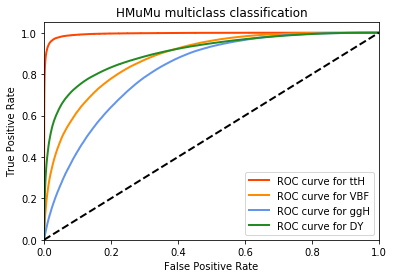

In [10]:
plt.figure(1)

colors = cycle(['orangered', 'darkorange', 'cornflowerblue','forestgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve for {0}'
             .format(classes[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('HMuMu multiclass classification')
plt.legend(loc="lower right")
plt.savefig("TPR_FPR_ROC.png",dpi=200)
plt.show()



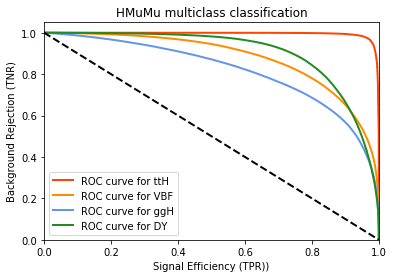

In [11]:
plt.figure(1)

colors = cycle(['orangered', 'darkorange', 'cornflowerblue','forestgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(tpr[i], tnr[i], color=color, lw=lw,
             label='ROC curve for {0}'
             .format(classes[i]))

plt.plot([0, 1], [1, 0], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Signal Efficiency (TPR))')
plt.ylabel('Background Rejection (TNR)')
plt.title('HMuMu multiclass classification')
plt.legend(loc="lower left")
plt.savefig("TNR_TPR_ROC.png",dpi=200)
plt.show()
